# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [40]:
# Import your libraries
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import numpy as np
import scipy 

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [67]:
# Your code here


# random numbers from uniform distribution
samples = [np.random.normal(loc = 50, scale = 5, size = s) for s in [10,50,500,5000]]
[scipy.stats.normaltest(sample) for sample in samples]






[NormaltestResult(statistic=2.2672534186278437, pvalue=0.32186383056808837),
 NormaltestResult(statistic=1.2548496888663243, pvalue=0.5339650751865395),
 NormaltestResult(statistic=0.5639904297281734, pvalue=0.7542772938438208),
 NormaltestResult(statistic=0.5585379863403439, pvalue=0.756336426516268)]

#### Interpret the normaltest results and make your observations.

In [68]:
# Explain the test results here
# The larger pvalues show that the largest samples are closer to
# normal distribution than de smallest samples

#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

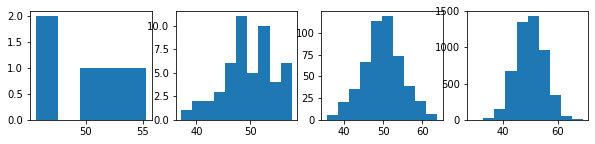

In [83]:
# Your code here
plt.figure(figsize=(10,2))
for i in range(0,4):
    plt.subplot(1,4,i+1)
    plt.hist(samples[i]) 

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

In [84]:
# Your comment and explanation here
# I see that the larger samples are more similar to normal distributions,
# this illustrates the Central Limit theorem as the mean of the sample 
# is closer to the mean of the population as you take more samples and 
# calculate the mean of the means of the sample. It is more accurate. 

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

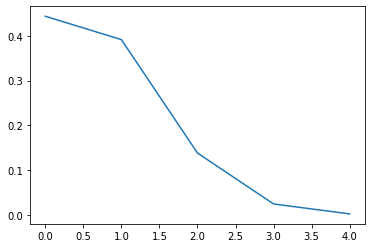

In [176]:
from scipy.stats import binom
n, p = 5, 0.15
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')
x = range(0,5)
sns.lineplot(x, binom.pmf(x, n, p));

#### Explain what you observe from the plot above

In [ ]:
# Your comment here
# The probability of not one person from the sample to watch the add 
# decreases as the sample is larger

#### Now plot PMP with 50, 500, and 5000 visitors.

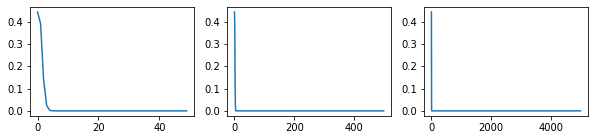

In [183]:
# Your code here
fig = plt.figure(figsize=(10,2))

plt.subplot(1,3,1)
x = range(0,50)
sns.lineplot(x, binom.pmf(x, n, p));

plt.subplot(1,3,2)
y = range(0,500)
sns.lineplot(y, binom.pmf(y, n, p));

plt.subplot(1,3,3)
z = range(0,5000)
sns.lineplot(z, binom.pmf(z, n, p));

#### What did you notice from the distribution plots? Comment your findings.

In [184]:
# Your comment here
# That the probability of no one visiting the add goes to 0 as the sample increases

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [ ]:
# Your comment here
# It expresses the probability of an event occuring a certain number of i

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

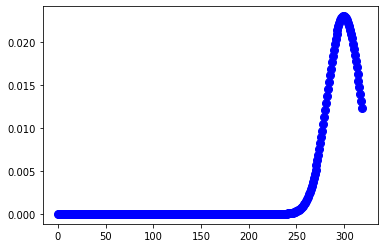

In [206]:
from scipy.stats import poisson
mu = 300
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')
x = np.arange(320),
plt.plot(x, poisson.pmf(x, mu),'bo', ms=8, label='poisson pmf');

#around 1.2% probable of getting 320

#### What is the probability of getting 60 visits?

In [ ]:
# Your code here
# 0%

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

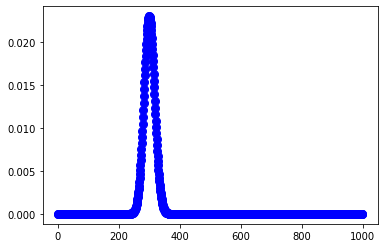

In [211]:
# your code here
mu = 300
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')
x = np.arange(1000),
plt.plot(x, poisson.pmf(x, mu),'bo', ms=8, label='poisson pmf');